In [1]:
import tensorflow as tf
import keras
# # Download and extract model
def download_model(model_name, model_date):
    base_url = 'http://download.tensorflow.org/models/object_detection/tf2/'
    model_file = model_name + '.tar.gz'
    model_dir = tf.keras.utils.get_file(fname=model_name,
                                        origin=base_url + model_date + '/' + model_file,
                                        untar=True)
    return str(model_dir)

MODEL_DATE = '20200711'
MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8'
PATH_TO_MODEL_DIR = download_model(MODEL_NAME, MODEL_DATE)


In [2]:
print(PATH_TO_MODEL_DIR)

C:\Users\rachel\.keras\datasets\ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8


In [ ]:
#Download dataset, comment out if downloaded
#!curl -L "https://app.roboflow.com/ds/nsF0X9wYgl?key=7fGs3wfrKQ" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [3]:
import os
print(os.getcwd())

c:\Users\rachel\seadrive_root\Rachel\My Libraries\Rachel\Capstone\Hydroponics\Faster_rcnn


In [4]:
#load model
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = "./workspace/training_pesttypes4/exported-models/my_model" + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 6.835850954055786 seconds


In [6]:
print(PATH_TO_SAVED_MODEL)
print(os.getcwd())

./workspace/training_pesttypes4/exported-models/my_model/saved_model
c:\Users\rachel\seadrive_root\Rachel\My Libraries\Rachel\Capstone\Hydroponics\Faster_rcnn


In [8]:
#Loading label map data
PATH_TO_LABELS = './workspace/training_pesttypes4/annotations/pests_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

In [9]:
import os
print(os.getcwd())

c:\Users\rachel\seadrive_root\Rachel\My Libraries\Rachel\Capstone\Hydroponics\Faster_rcnn


Running inference for .\Prediction images\Aphids\Aphids4.jpg... Done


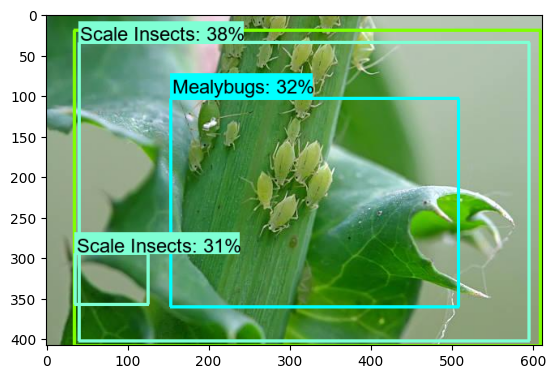

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

#warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


IMAGE_PATHS = [".\\Prediction images\\Aphids\\Aphids4.jpg"]
for image_path in IMAGE_PATHS:

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)

    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()

# sphinx_gallery_thumbnail_number = 2

SyntaxError: invalid syntax (2865319529.py, line 1)